In [7]:
#libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
df = yf.download('AAPL',start='2018-01-01', end='2025-07-31')
df

/tmp/ipython-input-92384454.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL',start='2018-01-01', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.426826,40.436216,39.722772,39.933990,102223600
2018-01-03,40.419788,40.964259,40.356426,40.490195,118071600
2018-01-04,40.607529,40.710791,40.384579,40.492532,89738400
2018-01-05,41.069870,41.156702,40.612235,40.703762,94640000
2018-01-08,40.917313,41.213014,40.818742,40.917313,82271200
...,...,...,...,...,...
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800


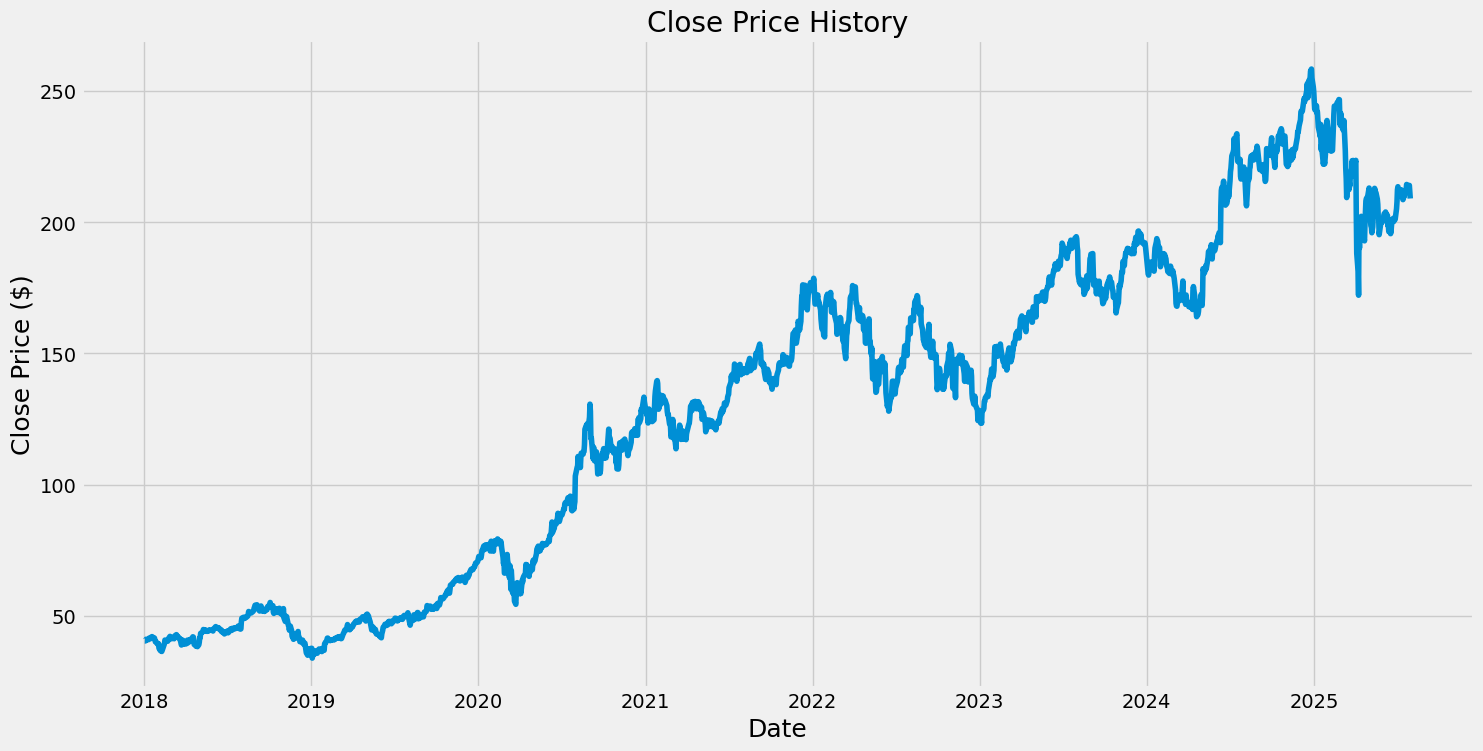

In [33]:
#Close price History
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.show()

In [34]:
#get close aline as datafrme
data = df['Close']
dataset = data.values
print(dataset)

#80% of rows to train data
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

[[ 40.42682648]
 [ 40.41978836]
 [ 40.60752869]
 ...
 [214.05000305]
 [211.27000427]
 [209.05000305]]


1524

In [35]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02919926],
       [0.02916791],
       [0.03000408],
       ...,
       [0.80248747],
       [0.79010583],
       [0.78021832]])

In [36]:
#training dataset
train_data = scaled_data[0:training_data_len, :]

#split data in x_train and y_train
x_trian = []
y_train = []

for i in range(60, len(train_data)):
    x_trian.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_trian)
        print(y_train)
        print()

[array([0.02919926, 0.02916791, 0.03000408, 0.03206327, 0.0313838 ,
       0.03136292, 0.03132111, 0.03235587, 0.03424781, 0.03330706,
       0.03634874, 0.03651598, 0.03567978, 0.03415374, 0.0341955 ,
       0.03124797, 0.0279972 , 0.02841531, 0.02470472, 0.02366988,
       0.0241507 , 0.02451652, 0.01690715, 0.01271575, 0.0195516 ,
       0.01590371, 0.01131508, 0.01329866, 0.01991055, 0.02162119,
       0.02480126, 0.0306995 , 0.03011174, 0.02950308, 0.02868445,
       0.03018523, 0.03333373, 0.03697556, 0.03636682, 0.03608346,
       0.03280904, 0.03407891, 0.03471915, 0.0345617 , 0.03284049,
       0.03484509, 0.03803553, 0.03986168, 0.03802506, 0.03641934,
       0.03663977, 0.03597848, 0.03312389, 0.03306089, 0.02889436,
       0.02635452, 0.02225097, 0.03046859, 0.02581928, 0.02386722])]
[np.float64(0.02523154884767853)]



In [37]:
#convert x_train and y_train to numpy arrays
y_train, x_trian = np.array(y_train), np.array(x_trian)

In [38]:
#reshaping the data
x_trian = np.reshape(x_trian, (x_trian.shape[0], x_trian.shape[1], 1))
x_trian.shape

(1464, 60, 1)

In [39]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_trian.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
#train the model
model.fit(x_trian, y_train, batch_size = 1, epochs=1)

1464/1464 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - loss: 0.0093


In [42]:
#create testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [43]:
#convert the data to numpy array
x_test = np.array(x_test)

In [44]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [45]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [46]:
#get RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

7.634717966516258


/tmp/ipython-input-1826066830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


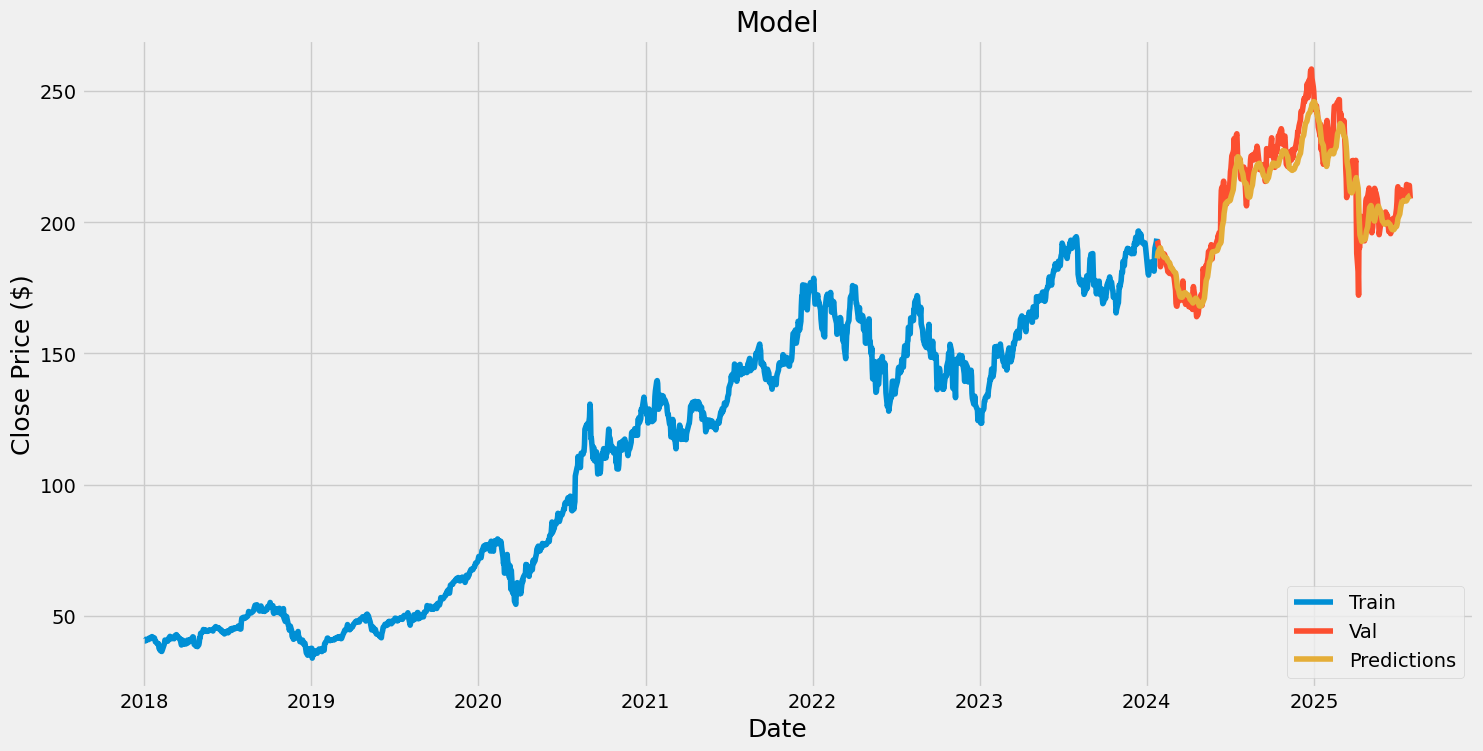

In [47]:
#plot data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
#Valid and predicted prices
valid

Price,Close,High,Low,Open,Volume,Predictions
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-01-24,193.085999,194.952336,192.927158,193.999308,53631300,186.182693
2024-01-25,192.758408,194.843147,191.706116,193.800777,54822100,187.530014
2024-01-26,191.021133,193.344118,190.544627,192.857690,44594000,188.741226
2024-01-29,190.336136,190.802720,188.201772,190.614099,47145600,189.626633
2024-01-30,186.672974,190.405649,186.107125,189.551900,55859400,190.182755
...,...,...,...,...,...,...
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600,209.022797
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800,209.450241


In [50]:
Apple_quote = yf.download('AAPL', start = '2012-01-01', end = '2025-12-31')
new_df = Apple_quote['Close']
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
#This is the closing price of 31st july

/tmp/ipython-input-2097835524.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Apple_quote = yf.download('AAPL', start = '2012-01-01', end = '2025-12-31')
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[209.49779]]
